Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [4]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [8]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print(daily_engagement[0])
print(project_submissions[0])

{'num_courses_visited': '1.0', 'utc_date': '2015-01-09', 'acct': '0', 'projects_completed': '0.0', 'lessons_completed': '0.0', 'total_minutes_visited': '11.6793745'}
{'completion_date': '2015-01-16', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED', 'assigned_rating': 'UNGRADED', 'creation_date': '2015-01-14'}


## Fixing Data Types

In [9]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [10]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [11]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [17]:
print(len(enrollments))
unique = set()
for e in enrollments:
    unique.add(e['account_key'])
len(unique)
## Find the total number of rows and the number of unique students (account keys)
## in each table.

1640


1302

In [18]:
len(daily_engagement)

136240

In [19]:
unique_de = set()
for e in daily_engagement:
    unique_de.add(e['acct'])
len(unique_de)

1237

## Problems in the Data

In [24]:
daily_engagement[0]

{'account_key': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [23]:
for e in daily_engagement:
    e['account_key'] = e['acct']
    del[e['acct']]

## Rename the "acct" column in the daily_engagement table to "account_key".

KeyError: 'acct'

In [25]:
daily_engagement[0]['account_key']

'0'

## Missing Engagement Records

In [27]:
for e in enrollments:
    if e['account_key'] not in unique_de:
        print(e)
        break

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

{'is_udacity': False, 'account_key': '1219', 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'is_canceled': True, 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0}


## Checking for More Problem Records

In [28]:
n_prob_students = 0
for e in enrollments:
    if e['account_key'] not in unique_de and e['join_date'] != e['cancel_date']:
        n_prob_students += 1
n_prob_students

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

3

## Tracking Down the Remaining Problems

In [32]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [33]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [35]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [36]:


## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for e in non_udacity_enrollments:
    if e['days_to_cancel'] is None or e['days_to_cancel'] > 7:
        paid_students[e['account_key']] = e['join_date']
len(paid_students)

995

## Getting Data from First Week

In [69]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [89]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_free_trial_cancels(data):
    new_data = []
    for d in data:
        if d['account_key'] in paid_students:
            new_data.append(d)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

for e in paid_engagement:
    if e['num_courses_visited'] > 0:
        e['has_visited'] = 1
    else:
        e['has_visited'] = 0

paid_engagement_in_first_week = []
for e in paid_engagement:
    account_key = e['account_key']
    join_date = paid_students[account_key]
    if within_one_week(join_date, e['utc_date']):
        paid_engagement_in_first_week.append(e)
paid_engagement_in_first_week
len(paid_engagement_in_first_week)

1293
134549
3618


6920

## Exploring Student Engagement

In [90]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for e in data:
        key = e[key_name]
        grouped_data[key].append(e)
    return grouped_data
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [91]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data
total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

Mean: 305.414718908
Standard deviation: 405.91261032
Minimum: 0.0
Maximum: 3564.7332645


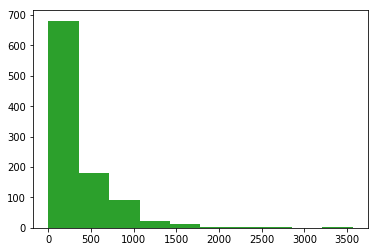

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Summarize the data about minutes spent in the classroom
def describe_data(data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    plt.hist(data)
    plt.show()

total_minutes = list(total_minutes_by_account.values())
#print(total_minutes)
describe_data(total_minutes)

## Debugging Data Analysis Code

In [93]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print(student_with_max_minutes, max_minutes)

163 3564.7332644989997


In [94]:
for e in paid_engagement_in_first_week:
    if e['account_key'] == student_with_max_minutes:
        print(e)

{'num_courses_visited': 4, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'has_visited': 1, 'projects_completed': 0, 'lessons_completed': 4, 'total_minutes_visited': 850.519339666}
{'num_courses_visited': 6, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'has_visited': 1, 'projects_completed': 0, 'lessons_completed': 6, 'total_minutes_visited': 872.633923334}
{'num_courses_visited': 2, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'has_visited': 1, 'projects_completed': 0, 'lessons_completed': 6, 'total_minutes_visited': 777.018903666}
{'num_courses_visited': 1, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'has_visited': 1, 'projects_completed': 0, 'lessons_completed': 2, 'total_minutes_visited': 294.568774}
{'num_courses_visited': 3, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'has_visited': 1, 'projects_completed': 0, 'lessons_completed': 1, 'total_minutes

## Lessons Completed in First Week

In [95]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(list(lessons_completed_by_account.values()))

Mean: 1.63216080402
Standard deviation: 3.00140182563
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [96]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(list(days_visited_by_account.values()))

Mean: 2.91256281407
Standard deviation: 2.22037005491
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [99]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for s in paid_submissions:
    project = s['lesson_key']
    rating = s['assigned_rating']
    if project in subway_project_lesson_keys and \
    (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(s['account_key'])

print(len(pass_subway_project))
            
    
passing_engagement = []
non_passing_engagement =[]

for e in paid_engagement_in_first_week:
    if e['account_key'] in pass_subway_project:
        passing_engagement.append(e)
    else:
        non_passing_engagement.append(e)

print(len(passing_engagement))
print(len(non_passing_engagement))

647
4528
2392


## Comparing the Two Student Groups

non-passing students:
Mean: 145.399341866
Standard deviation: 268.97150373
Minimum: 0.0
Maximum: 1768.52274933


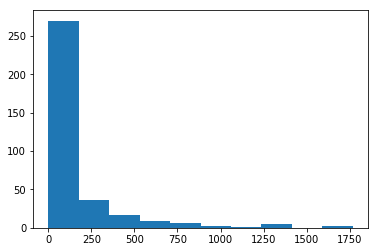


passing students:
Mean: 391.481722325
Standard deviation: 439.653061726
Minimum: 0.0
Maximum: 3564.7332645


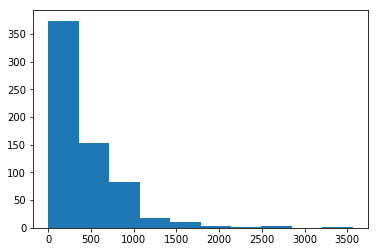

In [118]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

print('non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(list(non_passing_minutes.values()))
print('')
print('passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(list(passing_minutes.values()))



non-passing students:
Mean: 0.867816091954
Standard deviation: 2.54833703959
Minimum: 0
Maximum: 27


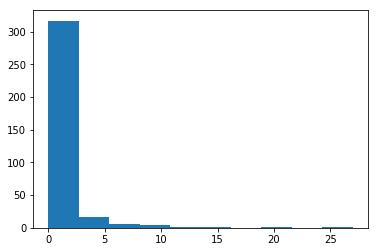


passing students:
Mean: 2.04327666151
Standard deviation: 3.1428602763
Minimum: 0
Maximum: 36


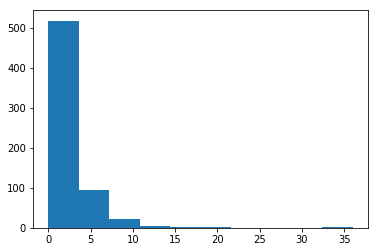

In [119]:
print('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(list(non_passing_lessons.values()))
print('')
print('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(list(passing_lessons.values()))


non-passing students:
Mean: 1.95114942529
Standard deviation: 1.88929952676
Minimum: 0
Maximum: 7


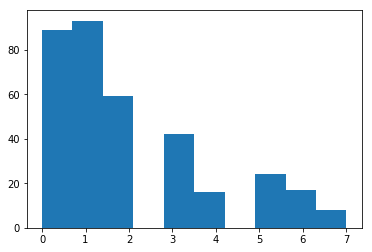


passing students:
Mean: 3.42967542504
Standard deviation: 2.21298340866
Minimum: 0
Maximum: 7


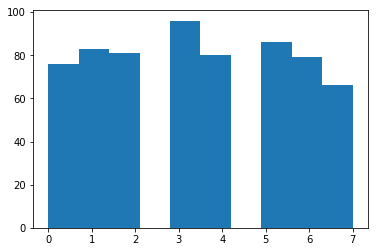

In [120]:
print('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,'has_visited')
describe_data(list(non_passing_visits.values()))
print('')
print('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(list(passing_visits.values()))


## Making Histograms

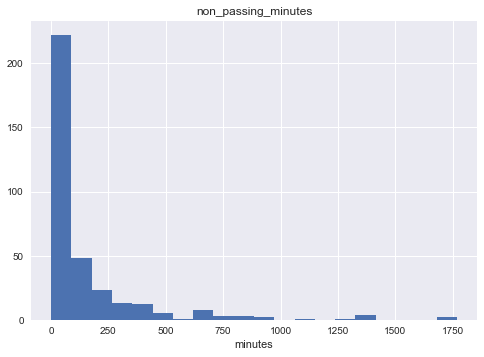

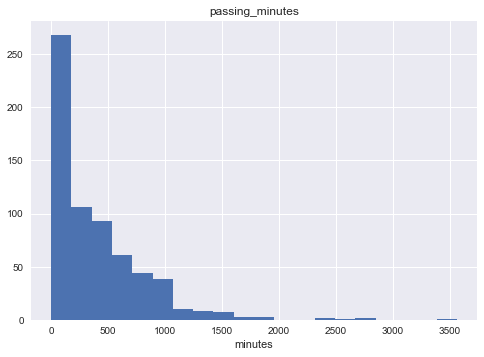

In [122]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(list(non_passing_minutes.values()), bins=20)
plt.xlabel('minutes')
plt.title("non_passing_minutes")
plt.show()
plt.hist(list(passing_minutes.values()), bins=20)
plt.xlabel('minutes')
plt.title("passing_minutes")
plt.show()

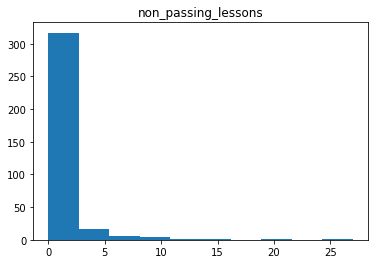

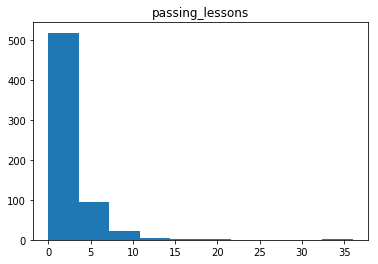

In [113]:
plt.hist(list(non_passing_lessons.values()))
plt.title("non_passing_lessons")
plt.show()
plt.hist(list(passing_lessons.values()))
plt.title("passing_lessons")
plt.show()

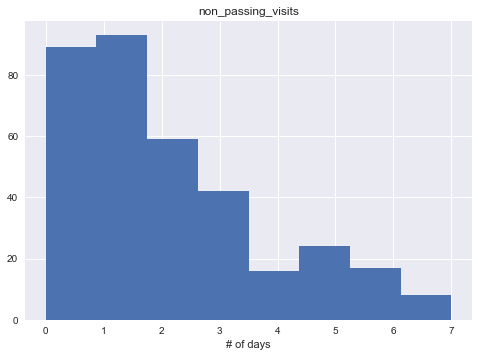

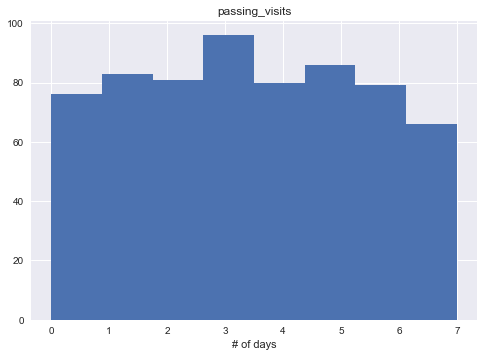

In [126]:
plt.hist(list(non_passing_visits.values()), bins=8)
plt.xlabel('# of days')
plt.title("non_passing_visits")
plt.show()
plt.hist(list(passing_visits.values()), bins=8)
plt.xlabel('# of days')
plt.title("passing_visits")
plt.show()

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
